# The Battle of the Neighborhood - Week 2

![Image of Tokyo](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS6_LVfm3NkecrfiBNHu4fh57ef3XajQFtx1FSPyJ_naqiwDWwu)

## Problem & Background:

### Background Information

An international fashion chain, XYZ Limited has decided to open their first store in Asia and is consideringTokyo as a potential candidate.

Being the capital of Japan with a local population of 13.9 million people and an annual 31.2 million foreign tourist in 2019 the city of Tokyo has a very large potential customer base, on top of this, the 2020 Olympics will also be held in Tokyo with a further expectation of an additional 10 million tourists and $283 billion boost to the Japanese Economy. XYZ Limited want to establish the store as soon as possible to capture this opportunity.

### Problem at hand

To investigate which area within the wards of Tokyo would be ideal to open a fashion retail store according to the criteria of XYZ Limited
#### Critera
1. The store should be located in a established leisure suburb where there is a number of existing clothing stores, cafe and resturants.
2. The store should consider the potential tourist as well as population in the area


### Data:

For this problem we will need to look at multiple source to obtain the data to solve this problem:

1. Wards of Tokyo:  
The link is a wikipedia webpage with information on wards/suburbs in Tokyo, it also provides the local population as of 2016 per each ward.  
Useage: We will be scaping this table to obtain a list of suburbs and passing it into a dataframe as basis for analysis. Some columns will not be neccessary and be dropped. We will also use the list of wards as input into Fourssqaure API.  
Link:https://en.wikipedia.org/wiki/Special_wards_of_Tokyo
2. Airbnb Data for Tokyo:  
This is a public dataset from kaggle which contains a listing of Airbnb locations with information on which suburbs the listing is in.  
Useage: We can import this CSV as a seperate dataframe to investigate the amount of potential tourist per suburb  
Link:https://www.kaggle.com/fuyutaro/tokyo-airbnb-open-data
3. Average Rent of Tokyo:  
This is an image of rental price per ward in Tokyo, this will have to be data entried into a dataframe.  
Useage: In case two wards are similar in composition, the deciding factor will be rental price.
Link:https://resources.realestate.co.jp/buy/what-is-the-average-rent-in-tokyo/

## Import Libraries and Credentials

In [234]:
#import libraries
import pandas as pd
import os
import requests
import json
import seaborn as sns

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [117]:
#Foursquare Credentials
CLIENT_ID = 'WW2MGJPDNM2MDHGJVUI0XGOHXLLCIDQWMYVQVOQG4CMMLCEM' # your Foursquare ID
CLIENT_SECRET = 'IHIBAXMGGKRNFFBPSKZ320XOAYRNMVXSSGWS511A14SV1UN4' # your Foursquare Secret
VERSION = '20180604'

## Exploring, Wrangling and Cleaning the Data

### Ward Info Data clean

In [118]:
#Scrap Toyko Ward Data From Wikipedia
from bs4 import BeautifulSoup

result = requests.get('https://en.wikipedia.org/wiki/Special_wards_of_Tokyo').text
soup = BeautifulSoup(result, 'lxml')
tbl_tokyo = soup.find('table', {'class' : 'wikitable sortable'})

In [119]:
df_raw = pd.DataFrame(pd.read_html(tbl_tokyo.prettify())[0])
df_raw.columns = ['No', 'Flag', 'Name', 'Kanji','Population','Density','Area','District']

In [120]:
df_raw.head()

,No,Flag,Name,Kanji,Population,Density,Area,District
0,01,NaN,Chiyoda,千代田区,"0 0 59,441","0 5,100",0 11.66,"Nagatachō , Kasumigaseki , Ōtemachi , Ma..."
1,02,NaN,Chūō,中央区,"0 147,620",14460,0 10.21,"Nihonbashi , Kayabachō, Ginza , Tsukiji ,..."
2,03,NaN,Minato,港区,"0 248,071",12180,0 20.37,"Odaiba , Shinbashi , Hamamatsuchō , Mita..."
3,04,NaN,Shinjuku,新宿区,"0 339,211",18620,0 18.22,"Shinjuku , Takadanobaba , Ōkubo , Kagura..."
4,05,NaN,Bunkyō,文京区,"0 223,389",19790,0 11.29,"Hongō , Yayoi , Hakusan"


In [139]:
#Clean the wikipedia data

df_ward = df_raw.copy()
df_ward['Population'] = df_ward['Population'].replace({'0 ': '', ' ': '', ',': ''}, regex=True)
df_ward['Density'] = df_ward['Density'].replace({'0 ': '', ' ': '', ',': ''}, regex=True)
df_ward['Area'] = df_ward['Area'].replace({'0 ': '', ' ': '', ',': ''}, regex=True)
df_ward['Population'] = df_ward['Population'].astype('int')
df_ward['Density'] = df_ward['Density'].astype('int')
df_ward['Area'] = df_ward['Area'].astype('float')
df_ward.drop(['Flag', 'Kanji', 'No'], axis=1 , inplace=True)
df_ward.drop(df_ward.tail(1).index,inplace=True)

df_ward['Name'] = df_ward['Name'].replace({'ō': 'o', 'Ō': 'O', 'ū': 'u'}, regex=True)
df_ward['District'] = df_ward['District'].replace({'ō': 'o', 'Ō': 'O', 'ū': 'u'}, regex=True)

In [140]:
df_ward

,Name,Population,Density,Area,District
0,Chiyoda,59441,5100,11.66,"Nagatacho , Kasumigaseki , Otemachi , Ma..."
1,Chuo,147620,14460,10.21,"Nihonbashi , Kayabacho, Ginza , Tsukiji ,..."
2,Minato,248071,12180,20.37,"Odaiba , Shinbashi , Hamamatsucho , Mita..."
3,Shinjuku,339211,18620,18.22,"Shinjuku , Takadanobaba , Okubo , Kagura..."
4,Bunkyo,223389,19790,11.29,"Hongo , Yayoi , Hakusan"
5,Taito,200486,19830,10.11,"Ueno , Asakusa"
6,Sumida,260358,18910,13.77,"Kinshicho , Morishita , Ryogoku"
7,Koto,502579,12510,40.16,"Kiba , Ariake , Kameido, Toyocho, Monzennak..."
8,Shinagawa,392492,17180,22.84,"Shinagawa , Gotanda , Osaki , Hatanodai, ..."
9,Meguro,280283,19110,14.67,"Meguro , Nakameguro , Jiyugaoka , Komaba..."


In [124]:
df_ward.dtypes

Name           object
Population      int32
Density         int32
Area          float64
District       object
dtype: object

In [125]:
#Check if there are any correlation within the dataframe
df_ward.corr()

,Population,Density,Area
Population,1.000000,-0.154581,0.952378
Density,-0.154581,1.000000,-0.404933
Area,0.952378,-0.404933,1.000000


#### Non Normalised Scatter  
Visualizing the three key variables

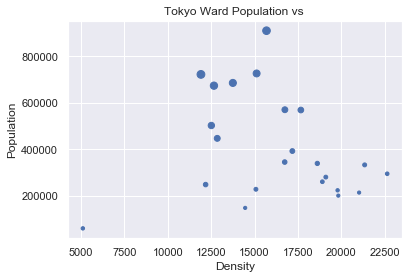

In [683]:
plt.scatter(df_ward['Density'], df_ward['Population'], s=df_ward['Area'])
plt.title("Tokyo Ward Population vs ")
plt.xlabel("Density")
plt.ylabel("Population")

plt.show()

#### Barchart Analysis  
Plot variables in decending order

Text(0.5, 1.0, 'Density')

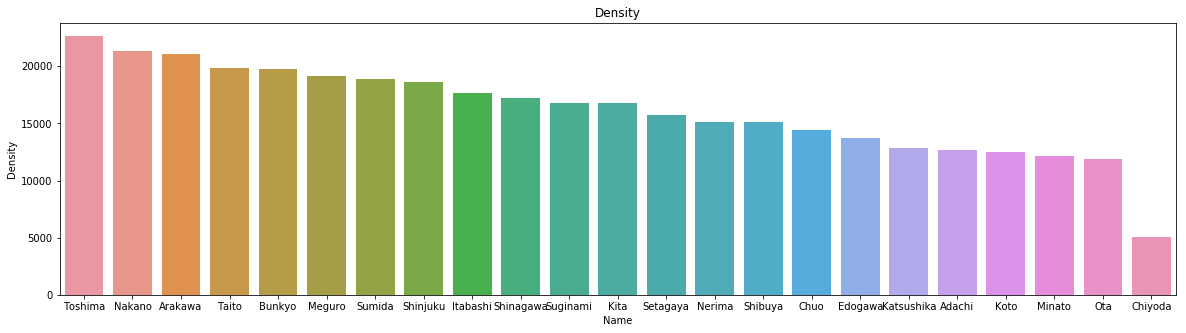

In [127]:
df_top_density= df_ward.groupby(["Name"])['Density'].mean().reset_index().sort_values('Density', ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(x="Name", y="Density", data=df_top_density).set_title("Density")

Text(0.5, 1.0, 'Population')

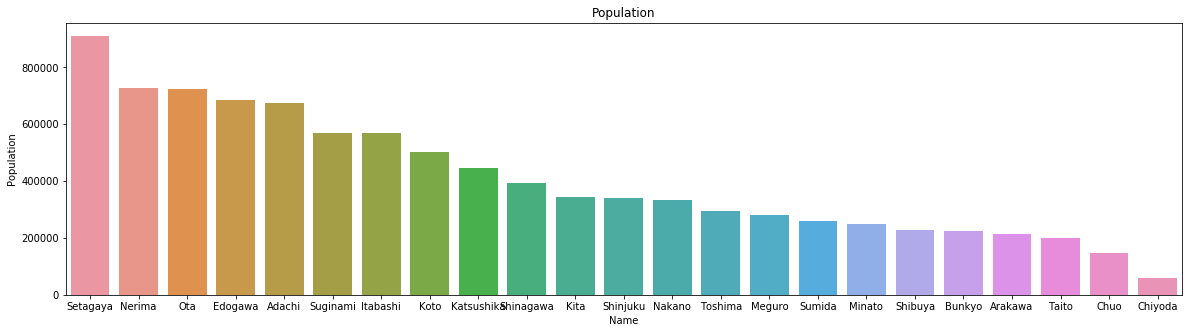

In [128]:
df_top_population = df_ward.groupby(["Name"])['Population'].mean().reset_index().sort_values('Population', ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(x="Name", y="Population", data=df_top_population).set_title("Population")

## Air BnB Data

### Data Import and Clean

In [129]:
filepath = "C:/Users/ayeun/AB_TYO_2019.csv"
df_bnb_raw = pd.read_csv(filepath)

In [130]:
df_bnb_raw.shape

(11466, 14)

In [131]:
df_bnb_raw.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month'],
      dtype='object')

In [132]:
df_bnb_raw[0:2]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65


In [133]:
#Drop columns that is not needed
df_bnb = df_bnb_raw.copy()
df_bnb.drop(['host_id','host_name', 'name', 'neighbourhood_group','last_review','minimum_nights'], axis = 1, inplace = True)
df_bnb.drop(['room_type','price','number_of_reviews'], axis = 1, inplace = True)

In [134]:
#Summarizing the count of Airbnb listings per ward
df_bnb['neighbourhood'] = df_bnb['neighbourhood'].replace({' Ku': ''}, regex=True)
df_bnb.groupby('neighbourhood').id.count().sort_values(ascending=False).head(10)

neighbourhood
Shinjuku    1882
Taito       1670
Toshima     1228
Sumida       879
Shibuya      854
Ota          598
Minato       551
Chuo         448
Setagaya     305
Suginami     299
Name: id, dtype: int64

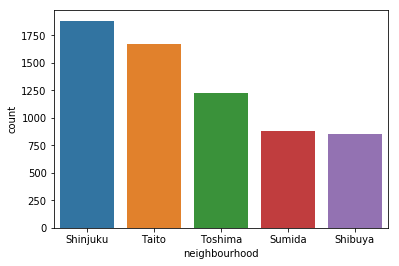

In [135]:
#Visualizing the Top 5 ward in Airbnb listings
sns.countplot(x='neighbourhood', data=df_bnb, order=df_bnb.neighbourhood.value_counts().iloc[:5].index)

In [141]:
#Putting the count summary into a dataframe
df_bnb_group = df_bnb.groupby('neighbourhood').id.count().sort_values(ascending=False).to_frame().reset_index()

## Merge the Ward information and Airbnb Information

### Joining the Data

In [142]:
# Renaming the columns
df_joint = df_ward.set_index('Name').join(df_bnb_group.set_index('neighbourhood'))
df_joint.rename(columns={"id": "a", "B": "c"})

In [192]:
df_joint.head(2)

,Population,Density,Area,District,id
Name,,,,,
Chiyoda,59441,5100,11.66,"Nagatacho , Kasumigaseki , Otemachi , Ma...",198
Chuo,147620,14460,10.21,"Nihonbashi , Kayabacho, Ginza , Tsukiji ,...",448


In [690]:
df_joint.head(2)

,Cluster Label,Population,Density,Area,District,id,Ward,Ward_Latitude,Ward_Longitude
Name,,,,,,,,,
Chiyoda,0,59441,5100,11.66,"Nagatacho , Kasumigaseki , Otemachi , Ma...",198,Chiyoda,35.693810,139.753216
Chuo,0,147620,14460,10.21,"Nihonbashi , Kayabacho, Ginza , Tsukiji ,...",448,Chuo,35.666255,139.775565


### Cluster Analysis

#### Cluster the wards to see the similarities

In [238]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

Tokyo_grouped_clustering = df_joint.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1,
       2])

In [241]:
# add clustering labels
df_joint.insert(0, 'Cluster Label', kmeans.labels_)
df_joint['Ward'] = df.index
df_joint[0:2]

,Cluster Label,Population,Density,Area,District,id
Name,,,,,,
Chiyoda,0,59441,5100,11.66,"Nagatacho , Kasumigaseki , Otemachi , Ma...",198
Chuo,0,147620,14460,10.21,"Nihonbashi , Kayabacho, Ginza , Tsukiji ,...",448


## Wards: Geo Location of wards

In [254]:
# Retrieve the Latitude and Longitude for Tokyo
address = 'Tokyo'
# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Tokyo_explorer")

location = geolocator.geocode(address)
Tokyo_latitude = location.latitude
Tokyo_longitude = location.longitude

print('The geographical coordinates of Tokyo are {}, {}.'.format(latitude, longitude))

df_joint['Ward_Coord'] = df_joint['Ward'].apply(geolocator.geocode).apply(lambda x : (x.latitude, x.longitude))
df_joint[['Ward_Latitude', 'Ward_Longitude']] = df_joint['Ward_Coord'].apply(pd.Series)
df_joint.drop(['Ward_Coord'], axis=1, inplace=True)
df_joint.head(3)

The geographical coordinates of Tokyo are 35.6828387, 139.7594549.


,Cluster Label,Population,Density,Area,District,id,Ward,Ward_Latitude,Ward_Longitude
Name,,,,,,,,,
Chiyoda,0,59441,5100,11.66,"Nagatacho , Kasumigaseki , Otemachi , Ma...",198,Chiyoda,35.693810,139.753216
Chuo,0,147620,14460,10.21,"Nihonbashi , Kayabacho, Ginza , Tsukiji ,...",448,Chuo,35.666255,139.775565
Minato,0,248071,12180,20.37,"Odaiba , Shinbashi , Hamamatsucho , Mita...",551,Minato,35.643227,139.740055


### Wards: Visualizing the clusters

In [256]:
# Lab Example
# create map
import numpy as np
map_ward_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_joint['Ward_Latitude'], df_joint['Ward_Longitude'], df_joint['Ward'], df_joint['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_ward_clusters)
       
map_ward_clusters

# Choosing 3 wards

### Normalise Scale  
Weighting Formula 0.4*Denisty score + 0.7*Airbnb Count score + 0.2 Population score

In [257]:
from sklearn import preprocessing

x = df_joint[['Population','Density','id']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_joint_scale = pd.DataFrame(x_scaled)
df_joint_scale.columns = ['N_Population','N_Density','N_Airbnb']
df_joint_scale['Score'] = (df_joint_scale.N_Density * 0.4) + (df_joint_scale.N_Airbnb * 0.7) + (df_joint_scale.N_Population * 0.2)
df_joint_scale.nlargest(3, 'Score')

C:\Users\ayeun\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,N_Population,N_Density,N_Airbnb,Score
3,0.328590,0.770370,1.000000,1.073866
5,0.165657,0.839316,0.883516,0.987319
15,0.276280,1.000000,0.640659,0.903717


In [260]:
#Identified the best option based on criteria are at Shinjuku, Taito amd Toshima
df_final = df_joint.iloc[[3,5 ,15]].copy()
df_final['Main_district'] = ['Shinjuku', 'Ueno', 'Ikebukuro' ] 
df_final.drop(['Cluster Label','Ward','Ward_Latitude','Ward_Longitude'], axis = 1, inplace = True)
df_final

,Population,Density,Area,District,id,Main_district
Name,,,,,,
Shinjuku,339211,18620,18.22,"Shinjuku , Takadanobaba , Okubo , Kagura...",1882,Shinjuku
Taito,200486,19830,10.11,"Ueno , Asakusa",1670,Ueno
Toshima,294673,22650,13.01,"Ikebukuro , Komagome , Senkawa, Sugamo",1228,Ikebukuro


In [679]:
# Retrieve the Latitude and Longitude for Tokyo
address = 'Tokyo'
# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Tokyo_explorer")

location = geolocator.geocode(address)
Tokyo_latitude = location.latitude
Tokyo_longitude = location.longitude

print('The geographical coordinates of Toyko are {}, {}.'.format(latitude, longitude))

df_final['Main_Dist_Coord'] = df_final['Main_district'].apply(geolocator.geocode).apply(lambda x : (x.latitude, x.longitude))
df_final[['Main_Dist_Latitude', 'Main_Dist_Longitude']] = df_final['Main_Dist_Coord'].apply(pd.Series)
df_final.drop(['Main_Dist_Coord'], axis=1, inplace=True)
df_final

The geographical coordinates of Toyko are 35.6828387, 139.7594549.


,Population,Density,Area,District,id,Main_district,Main_Dist_Latitude,Main_Dist_Longitude
Name,,,,,,,,
Shinjuku,339211,18620,18.22,"Shinjuku , Takadanobaba , Okubo , Kagura...",1882,Shinjuku,35.693763,139.703632
Taito,200486,19830,10.11,"Ueno , Asakusa",1670,Ueno,35.711759,139.777645
Toshima,294673,22650,13.01,"Ikebukuro , Komagome , Senkawa, Sugamo",1228,Ikebukuro,35.729799,139.710242


### Use Folium to show the three main districts we are focusing on

In [262]:
# create map of Tokyo using the above latitude and longitude values
map_Tokyo = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(df_final['Main_Dist_Latitude'], df_final['Main_Dist_Longitude'], df_final['Main_district']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_Tokyo)  
    
map_Tokyo

## Get Venue data on chosen wards  
### Use FourSquare to get location data

#### Further than selecting three wards, we will look at only the ward's main district to further remine our searches

In [225]:
radius = 1000
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

In [226]:

Tokyo_Dist_Venues = getNearbyVenues(names=df_final['Main_district'],
                                   latitudes=df_final['Main_Dist_Latitude'],
                                   longitudes=df_final['Main_Dist_Longitude']
                                  )

Shinjuku
Ueno
Ikebukuro


In [227]:
Tokyo_Dist_Venues.head()

,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
0,Shinjuku,35.693763,139.703632,Metal Bar GODZ,35.694921,139.702918,Bar
1,Shinjuku,35.693763,139.703632,Rock Bar Mother,35.694661,139.702795,Bar
2,Shinjuku,35.693763,139.703632,Thermae Yu (テルマー湯),35.694526,139.705139,Spa
3,Shinjuku,35.693763,139.703632,Michishirube (道しるべ),35.694744,139.703705,Yakitori Restaurant
4,Shinjuku,35.693763,139.703632,The OPEN BOOK,35.694069,139.704926,Bar


In [229]:
Tokyo_Dist_Venues.shape

(300, 7)

In [280]:
Tokyo_Dist_Venues[99:105]

,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
99,Shinjuku,35.693763,139.703632,Afilia Asterisk (アフィリア・アスタリスク),35.691377,139.706738,Bar
100,Ueno,35.711759,139.777645,Afilia Sherry's (アフィリア・シェリーズ),35.711089,139.775196,Cocktail Bar
101,Ueno,35.711759,139.777645,Okina-an (翁庵),35.711879,139.778656,Soba Restaurant
102,Ueno,35.711759,139.777645,COCKTAIL WORKS (カクテルワークス),35.709866,139.776488,Cocktail Bar
103,Ueno,35.711759,139.777645,Motsuyaki Daitoryo (もつ焼き大統領 支店),35.710369,139.775326,Sake Bar
104,Ueno,35.711759,139.777645,Niku no Oyama (肉の大山),35.710392,139.775242,Steakhouse


## Analyze General Location Data

### Plot the most popular venue per District

In [263]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(Tokyo_Dist_Venues['Venue_Category'].unique())))

There are 105 unique categories.


In [286]:
df_Top10_All = Tokyo_Dist_Venues['Venue_Category'].value_counts().head(10).to_frame().reset_index()
df_Top10_Shinjuku = Tokyo_Dist_Venues[Tokyo_Dist_Venues['District'] == "Shinjuku"].Venue_Category.value_counts().head(10).to_frame().reset_index()
df_Top10_Taito = Tokyo_Dist_Venues[Tokyo_Dist_Venues['District'] == "Ueno"].Venue_Category.value_counts().head(10).to_frame().reset_index()
df_Top10_Toshima = Tokyo_Dist_Venues[Tokyo_Dist_Venues['District'] == "Ikebukuro"].Venue_Category.value_counts().head(10).to_frame().reset_index()

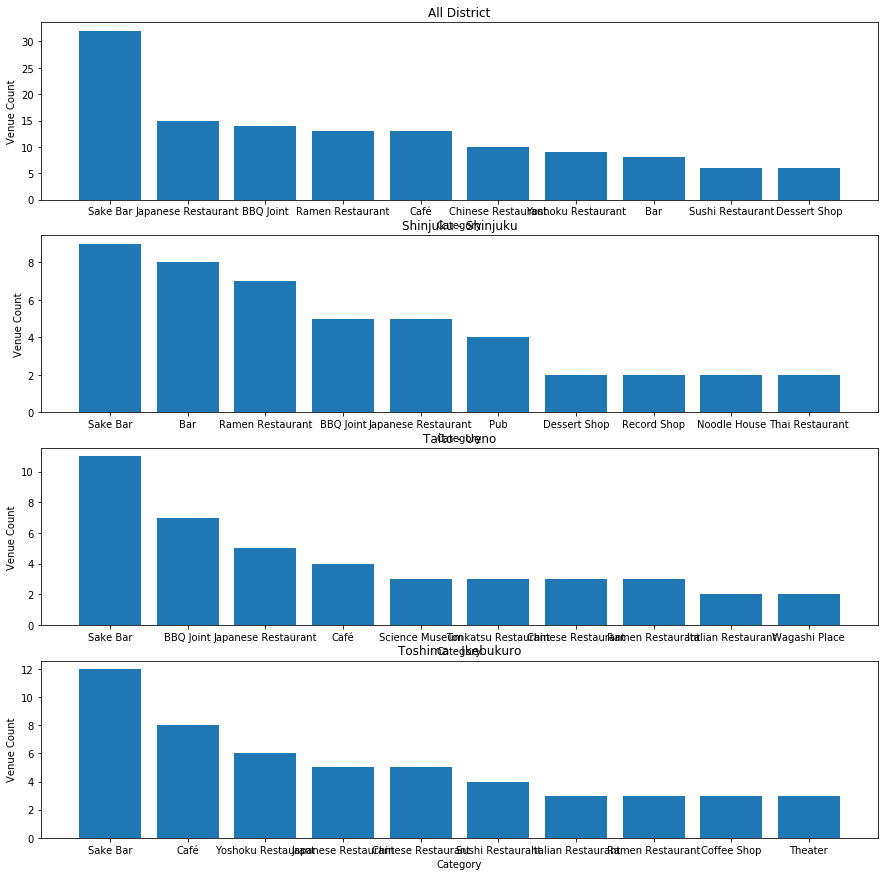

In [308]:
#The below code will create two plots. The parameters that .subplot take are (row, column, no. of plots).

plt.figure(figsize=(15,15))
plt.subplot(4,1,1)

#This will create the bar graph for poulation
All = plt.bar(df_Top10_All['index'], df_Top10_All['Venue_Category'])
plt.title("All District")
plt.ylabel('Venue Count')
plt.xlabel('Category')

#The below code will create the second plot.
plt.subplot(4,1,2)
#This will create the bar graph for gdp i.e gdppercapita divided by population.
Shinjuku = plt.bar(df_Top10_Shinjuku['index'], df_Top10_Shinjuku['Venue_Category'])
plt.title("Shinjuku - Shinjuku")
plt.ylabel('Venue Count')
plt.xlabel('Category')

#The below code will create the third plot.
plt.subplot(4,1,3)
#This will create the bar graph for gdp i.e gdppercapita divided by population.
plt.title("Taito - Ueno")
Taito = plt.bar(df_Top10_Taito['index'], df_Top10_Taito['Venue_Category'])
plt.ylabel('Venue Count')
plt.xlabel('Category')

#The below code will create the Fourth plot.
plt.subplot(4,1,4)
#This will create the bar graph for gdp i.e gdppercapita divided by population.
Toshima = plt.bar(df_Top10_Toshima['index'], df_Top10_Toshima['Venue_Category'])
plt.title("Toshima - Ikebukuro")
plt.ylabel('Venue Count')
plt.xlabel('Category')

plt.show()

### Use Onehot Coding and create a Top 10 Venue table

In [313]:
### Use One Hot Encoding to Get More Information about the Venue Categories 
District_Venues_onehot = pd.get_dummies(Tokyo_Dist_Venues[['Venue_Category']], prefix="", prefix_sep="")

### add district column back to dataframe
District_Venues_onehot['District'] = Tokyo_Dist_Venues['District'] 
### move district column to the first column
fixed_columns = [District_Venues_onehot.columns[-1]] + list(District_Venues_onehot.columns[:-1])
District_Venues_onehot = District_Venues_onehot[fixed_columns]
#District_Venues_onehot[0:2]

,District,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,Bar,Bath House,Bed & Breakfast,Beer Bar,...,Tonkatsu Restaurant,Toy / Game Store,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
0,Shinjuku,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Shinjuku,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [314]:
District_Venues_onehot_Grouped = District_Venues_onehot.groupby('District').mean().reset_index()
District_Venues_onehot_Grouped.index = np.arange(1, len(District_Venues_onehot_Grouped)+1)
District_Venues_onehot_Grouped[0:2]

,District,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,Bar,Bath House,Bed & Breakfast,Beer Bar,...,Tonkatsu Restaurant,Toy / Game Store,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
1,Ikebukuro,0.0,0.0,0.0,0.02,0.02,0.00,0.0,0.00,0.02,...,0.00,0.0,0.01,0.00,0.0,0.01,0.0,0.00,0.01,0.06
2,Shinjuku,0.0,0.0,0.0,0.00,0.05,0.08,0.0,0.01,0.01,...,0.02,0.0,0.00,0.01,0.0,0.00,0.0,0.01,0.02,0.01


In [315]:

num_top_venues = 5

for places in District_Venues_onehot_Grouped['District']:
    print("%%%%%%%%%"+places+"%%%%%%%%")
    temp = District_Venues_onehot_Grouped[District_Venues_onehot_Grouped['District'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

%%%%%%%%%Ikebukuro%%%%%%%%
                 Venue  Freq
0             Sake Bar  0.12
1                 Café  0.08
2   Yoshoku Restaurant  0.06
3   Chinese Restaurant  0.05
4  Japanese Restaurant  0.05


%%%%%%%%%Shinjuku%%%%%%%%
                 Venue  Freq
0             Sake Bar  0.09
1                  Bar  0.08
2     Ramen Restaurant  0.07
3            BBQ Joint  0.05
4  Japanese Restaurant  0.05


%%%%%%%%%Ueno%%%%%%%%
                 Venue  Freq
0             Sake Bar  0.11
1            BBQ Joint  0.07
2  Japanese Restaurant  0.05
3                 Café  0.04
4     Ramen Restaurant  0.03




In [321]:
## Define a Function to select the top 10 rows (According to the Values) 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_top10_table = pd.DataFrame(columns=columns)
District_top10_table['District'] = District_Venues_onehot_Grouped['District']

for ind in np.arange(District_Venues_onehot_Grouped.shape[0]):
    District_top10_table.iloc[ind, 1:] = return_most_common_venues(District_Venues_onehot_Grouped.iloc[ind, :], num_top_venues)

    
District_top10_table.index = np.arange(1, len(District_top10_table)+1)
District_top10_table.head(5)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Ikebukuro,Sake Bar,Café,Yoshoku Restaurant,Japanese Restaurant,Chinese Restaurant,Sushi Restaurant,Italian Restaurant,Ramen Restaurant,Coffee Shop,Theater
2,Shinjuku,Sake Bar,Bar,Ramen Restaurant,Japanese Restaurant,BBQ Joint,Pub,Yakitori Restaurant,Noodle House,Chinese Restaurant,Dessert Shop
3,Ueno,Sake Bar,BBQ Joint,Japanese Restaurant,Café,Science Museum,Ramen Restaurant,Tonkatsu Restaurant,Chinese Restaurant,Yoshoku Restaurant,Soba Restaurant


### Use Violin Plot to visualise the result

C:\Users\ayeun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


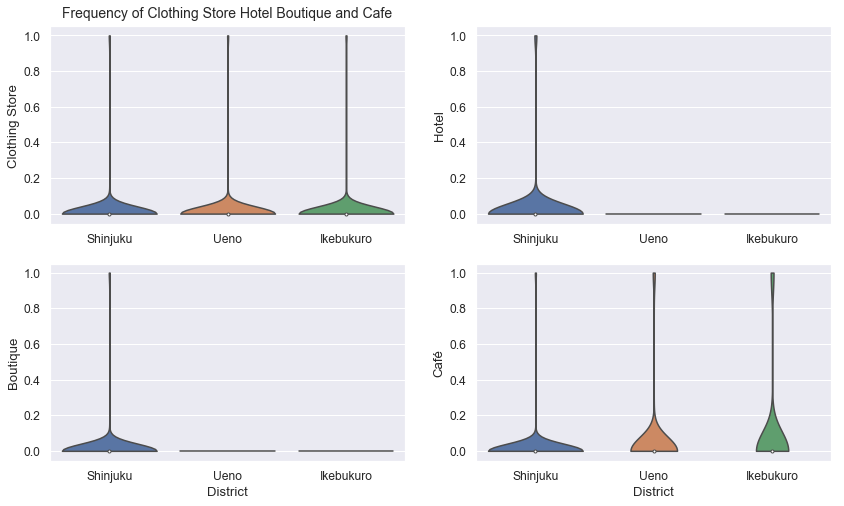

In [684]:
fig = plt.figure(figsize=(14,8))

sns.set(font_scale=1.1)
ax = plt.subplot(2,2,1)
sns.violinplot(x="District", y="Clothing Store", data=District_Venues_onehot, cut=0);
plt.xlabel("")
ax = plt.subplot(2,2,2)
sns.violinplot(x="District", y="Hotel", data=District_Venues_onehot, cut=0);
plt.xlabel("")
plt.subplot(2,2,3)
sns.violinplot(x="District", y="Boutique", data=District_Venues_onehot, cut=0);
plt.subplot(2,2,4)
sns.violinplot(x="District", y="Café", data=District_Venues_onehot, cut=0);

ax.text(-4.0, 1.1, 'Frequency of Clothing Store Hotel Boutique and Cafe', fontsize=14)
plt.savefig ("Violin_plots_Dist_Frequent_Restaurant.png", dpi=240)
plt.show()

## District: Analyze Fashion Shop Category Only

### Use Foursquare to get list of Fashion Venue in each district

In [412]:
radius = 1000
LIMIT = 100
#Foursquare Clothing Category ID
cat_ID = '4bf58dd8d48988d103951735'

def getNearbyVenuesFashion(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            cat_ID)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

In [413]:
Dist_Fashion_Venues = getNearbyVenuesFashion(names=df_final['Main_district'],
                                   latitudes=df_final['Main_Dist_Latitude'],
                                   longitudes=df_final['Main_Dist_Longitude']
                                  )

Shinjuku
Ueno
Ikebukuro


In [411]:
Dist_Fashion_Venues.shape

(254, 7)

## Analyze the District Fasion Data

In [463]:
Fashion_Venues_Shinjuku = Dist_Fashion_Venues[Dist_Fashion_Venues['District'] == "Shinjuku"].Venue_Category.value_counts().to_frame().reset_index().sort_values('Venue_Category', ascending=False)
Fashion_Venues_Ueno = Dist_Fashion_Venues[Dist_Fashion_Venues['District'] == "Ueno"].Venue_Category.value_counts().to_frame().reset_index().sort_values('Venue_Category', ascending=False)
Fashion_Venues_Ikebukuro = Dist_Fashion_Venues[Dist_Fashion_Venues['District'] == "Ikebukuro"].Venue_Category.value_counts().to_frame().reset_index().sort_values('Venue_Category', ascending=False)

In [569]:
Fashion_Venues_All = pd.merge(Fashion_Venues_Shinjuku, Fashion_Venues_Ueno, on='index', how='outer')
Fashion_Venues_All = pd.merge(Fashion_Venues_All, Fashion_Venues_Ikebukuro, on='index', how='outer')
Fashion_Venues_All.rename(columns={"Venue_Category_x": "Shinjuku", "Venue_Category_y": "Ueno","Venue_Category": "Ikebukuro"}, inplace=True)
Fashion_Venues_All

,index,Shinjuku,Ueno,Ikebukuro
0,Clothing Store,42.0,27.0,38.0
1,Boutique,23.0,3.0,10.0
2,Women's Store,13.0,5.0,6.0
3,Men's Store,9.0,6.0,13.0
4,Shoe Store,6.0,15.0,14.0
5,Sporting Goods Shop,2.0,1.0,1.0
6,Arts & Crafts Store,1.0,NaN,NaN
7,Thrift / Vintage Store,1.0,NaN,NaN
8,Outdoor Supply Store,1.0,NaN,NaN
9,Cosmetics Shop,1.0,NaN,1.0


### Lets look at the Top 6 category 

In [570]:
Fashion_Venues_All.drop(Fashion_Venues_All.index[6:], inplace=True)
Fashion_Venues_All

,index,Shinjuku,Ueno,Ikebukuro
0,Clothing Store,42.0,27.0,38.0
1,Boutique,23.0,3.0,10.0
2,Women's Store,13.0,5.0,6.0
3,Men's Store,9.0,6.0,13.0
4,Shoe Store,6.0,15.0,14.0
5,Sporting Goods Shop,2.0,1.0,1.0


### Visualize the result using stacked bar plot

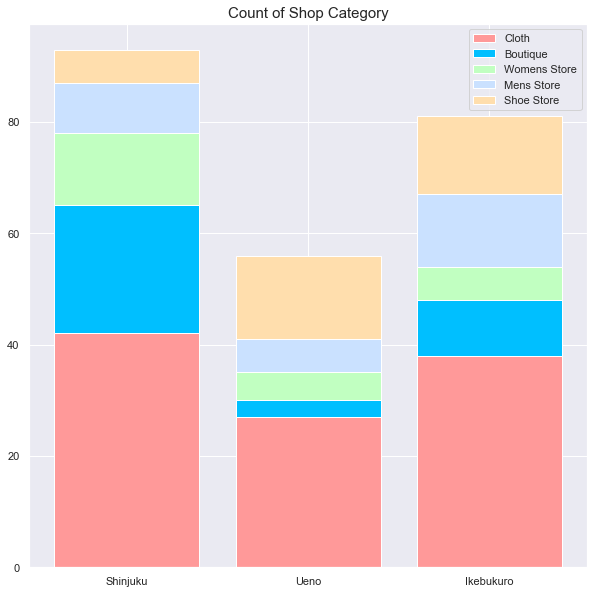

In [585]:
%matplotlib inline
x = np.arange(3)

#add colors
colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']

plt.figure(figsize = (10,10))
District = "Shinjuku", "Ueno", "Ikebukuro"

plt.bar(x,Fashion_Venues_All.iloc[0, 1:4], label = "Cloth", color=colors[0], edgecolor='white')

bottom_value = np.array(Fashion_Venues_All.iloc[0, 1:4])
plt.bar(x, Fashion_Venues_All.iloc[1, 1:4], bottom=bottom_value, color=colors[1], edgecolor='white', label='Boutique')

bottom_value = bottom_value + np.array(Fashion_Venues_All.iloc[1, 1:4])
plt.bar(x, Fashion_Venues_All.iloc[2, 1:4], bottom=bottom_value, color=colors[2], edgecolor='white', label='Womens Store')

bottom_value = bottom_value + np.array(Fashion_Venues_All.iloc[2, 1:4])
plt.bar(x, Fashion_Venues_All.iloc[3, 1:4], bottom=bottom_value, color=colors[3], edgecolor='white', label='Mens Store')

bottom_value = bottom_value + np.array(Fashion_Venues_All.iloc[3, 1:4])
plt.bar(x,Fashion_Venues_All.iloc[4, 1:4], bottom = bottom_value, color=colors[4], edgecolor='white', label = "Shoe Store")


plt.title('Count of Shop Category', fontsize = 15)
plt.xticks(x,District)
plt.legend()
plt.show()

### Putting Everything on an Interactive  Map

In [587]:
# Retrieve the Latitude and Longitude for Tokyo
address = 'Shinjuku'
# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Shinjuku_explorer")

location = geolocator.geocode(address)
Shinjuku_latitude = location.latitude
Shinjuku_longitude = location.longitude

print('The geographical coordinates of Shinjuku are {}, {}.'.format(Shinjuku_latitude, Shinjuku_longitude))

The geographical coordinates of Shinjuku are 35.6937632, 139.7036319.


In [657]:
# Prepare location data
Shinjuku_Shops = Dist_Fashion_Venues[Dist_Fashion_Venues['District'] == "Shinjuku"]
Shinjuku_Shops_Coord = Shinjuku_Shops[['Venue_Lat', 'Venue_Long']].values.tolist()
Shinjuku_Airbnb = df_bnb[df_bnb['neighbourhood'] == "Shinjuku"].reset_index()
Shinjuku_Airbnb_Coord = Shinjuku_Airbnb[['latitude', 'longitude']].values.tolist()

print('Shinjuku Shop shape: ', Shinjuku_Shops.shape)
print('Shinjuku Airbnb shape: ', Shinjuku_Airbnb.shape)

Shinjuku Shop shape:  (100, 7)
Shinjuku Airbnb shape:  (1882, 6)


In [678]:
from folium.plugins import MarkerCluster


# create map using the above latitude and longitude values
map_Shinjuku = folium.Map(location=[Shinjuku_latitude, Shinjuku_longitude], tiles='Stamen Terrain', zoom_start=14)
marker_cluster1 = MarkerCluster().add_to(map_Shinjuku)
marker_cluster2 = MarkerCluster().add_to(map_Shinjuku)

for x in range(0, len(Shinjuku_Shops_Coord)):
    folium.Marker(Shinjuku_Shops_Coord[x],  icon=folium.Icon(color='darkblue', angle=0, prefix='fa')).add_to(marker_cluster1)

for y in range(0, len(Shinjuku_Airbnb_Coord)):
    folium.Marker(Shinjuku_Airbnb_Coord[y], icon=folium.Icon(color='red', angle=0, prefix='fa')).add_to(marker_cluster2)    

map_Shinjuku